In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [61]:
df = pd.read_csv("IMDb Movies India.csv", encoding = ("ISO-8859-1"), low_memory = False)

In [62]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [63]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [64]:
df.shape

(15509, 10)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [66]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [67]:
print("Any missing value: ",df.isnull().values.any())

Any missing value:  True


In [68]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


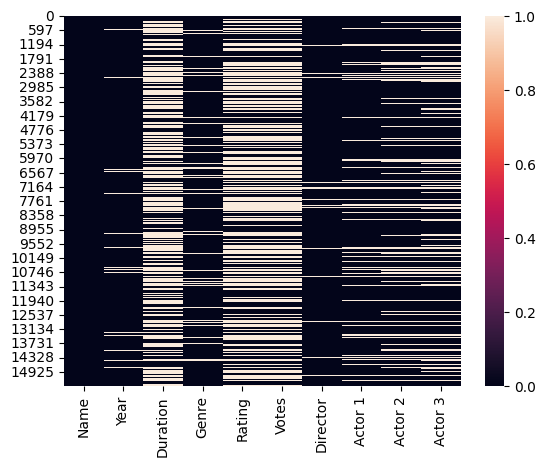

In [69]:
sns.heatmap(df.isnull())
plt.show()

In [70]:
per_missing = (df.isnull().sum() * 100 / len(df)).round()
per_missing

,0
Name,0.0
Year,3.0
Duration,53.0
Genre,12.0
Rating,49.0
Votes,49.0
Director,3.0
Actor 1,10.0
Actor 2,15.0
Actor 3,20.0


In [71]:
df.dropna(axis= 0, inplace= True)

In [72]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [73]:
df.shape

(5659, 10)

In [74]:
dupl_df = df.duplicated().any()
print("Are there any duplicate values?", dupl_df)

Are there any duplicate values? False


In [75]:
df = df.drop_duplicates()
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [76]:
df1 = pd.DataFrame(df)
# Convert the 'Price' column to float
df1['Votes'] = df1['Votes'].str.replace('[^\d.]', '', regex=True).astype(float)
df1.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,float64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [77]:
df1 = pd.DataFrame(df)
# Convert the 'Price' column to float
df1['Year'] = df1['Year'].str.replace('[^\d.]', '', regex=True).astype('Int64')
df1.dtypes

,0
Name,object
Year,Int64
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [78]:
df1 = pd.DataFrame(df)
# Convert the 'Price' column to float
df1['Duration'] = df1['Duration'].str.replace('[^\d.]', '', regex=True).astype(float)
df1.dtypes

,0
Name,object
Year,object
Duration,float64
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [79]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [80]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [81]:
# Convert the 'Duration' column to integers
df['Duration'] = df['Duration'].str.replace('[^\d.]', '', regex=True).astype(int)

# Now perform the comparison
df[df["Duration"] >= 120]["Name"]

,Name
5,...Aur Pyaar Ho Gaya
6,...Yahaan
11,1:13:7 Ek Tera Saath
12,100 Days
13,100% Love
...,...
15492,Zorro
15494,Zubeidaa
15503,Zulm Ki Zanjeer
15505,Zulmi


In [82]:
# Convert 'Votes' column to numeric, handling potential errors
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Group by 'Year', calculate mean of 'Votes', and sort
df.groupby("Year")["Votes"].mean().sort_values(ascending=False)

,Votes
Year,
(2003),260.987179
(2008),260.190476
(2010),258.540541
(2009),256.443038
(2002),253.450000
...,...
(1933),12.000000
(1932),12.000000
(1938),10.600000


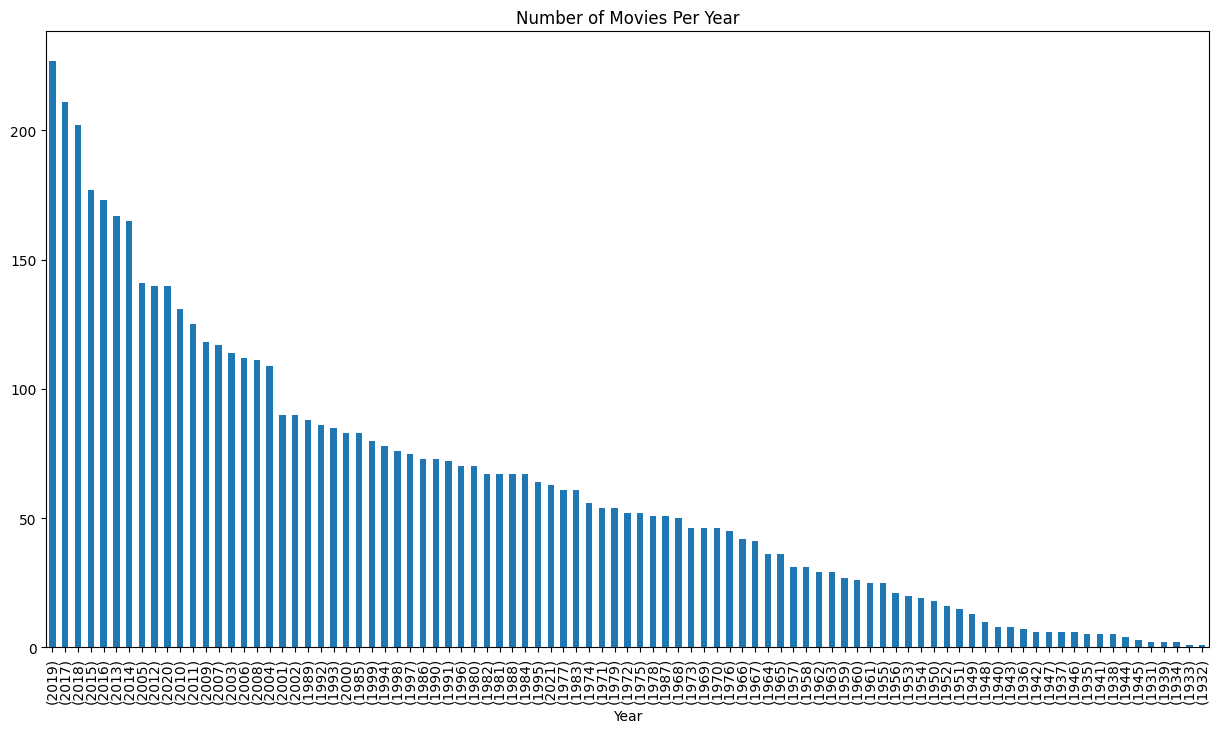

In [83]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')
plt.show()

In [84]:
df.groupby("Director")["Rating"].mean()

,Rating
Director,
A. Bhimsingh,6.785714
A. Jagannathan,5.833333
A. Majid,5.700000
A. Muthu,3.000000
A. Salaam,5.575000
...,...
Zia Sarhadi,6.366667
Ziaullah Khan,5.600000
Zoya Akhtar,6.800000


In [85]:
top10 = df.nlargest(10, "Duration")[["Name", "Duration"]].set_index("Name")
top10

,Duration
Name,
Gangs of Wasseypur,321
Athidhi,300
LOC: Kargil,255
Vidhyaarthi: The Power of Students,250
Janwar,247
Aasma: The Sky Is the Limit,240
Veera,240
Vivekananda,240
Sangam,238


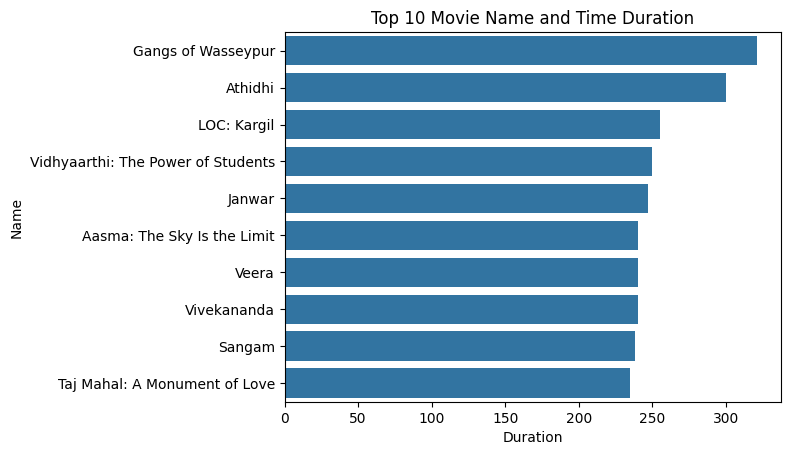

In [86]:
sns.barplot(x = "Duration", y = top10.index,data = top10)
plt.title("Top 10 Movie Name and Time Duration")
plt.show()

In [87]:
df["Year"].value_counts()

,count
Year,
(2019),227
(2017),211
(2018),202
(2015),177
(2016),173
...,...
(1931),2
(1939),2
(1934),2


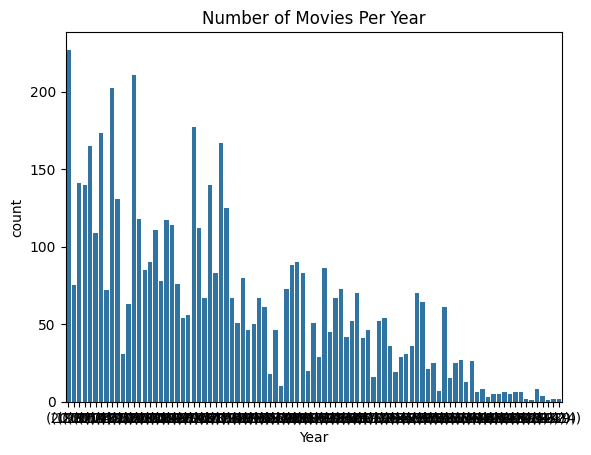

In [88]:
sns.countplot(x = "Year", data = df)
plt.title("Number of Movies Per Year")
plt.show()

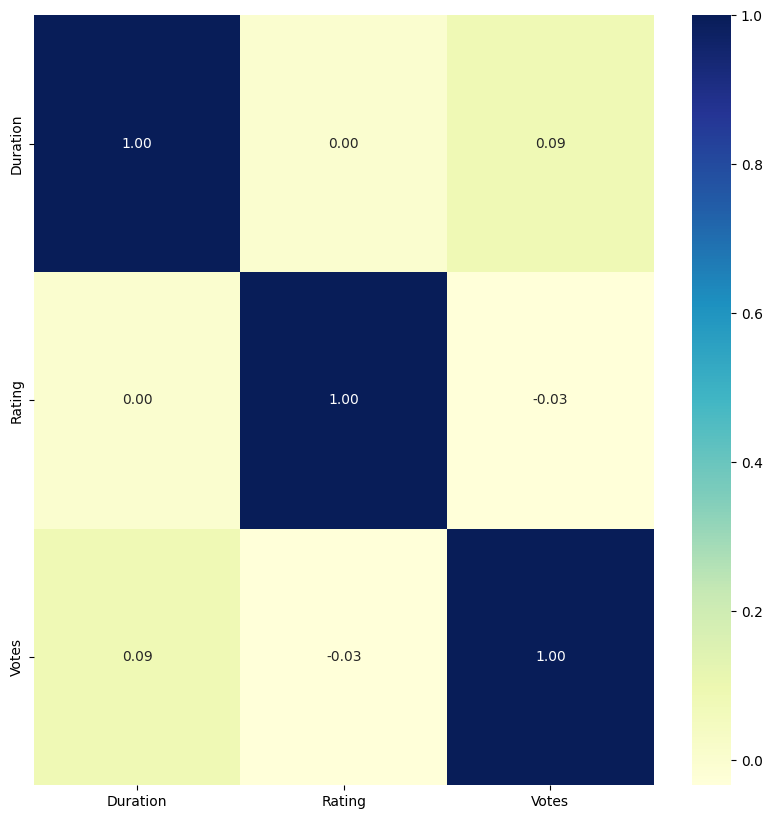

In [89]:
# Convert 'Duration' column to numeric type, handling errors
df["Duration"] = pd.to_numeric(df["Duration"], errors='coerce')

plt.subplots(figsize=(10, 10))

# Select only numerical columns for correlation calculation
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

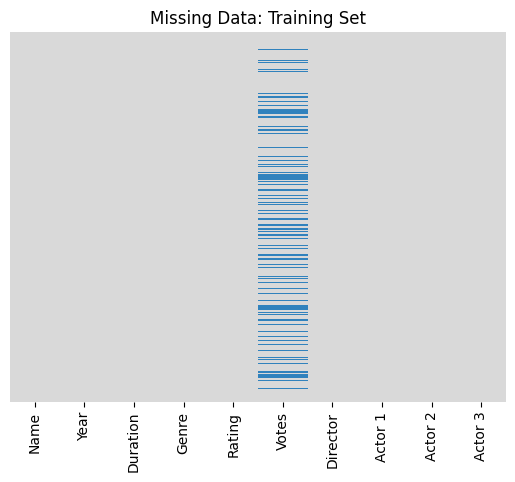

In [90]:
# Missing Value | Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [91]:

df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,1368
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [92]:
df.drop(['Name','Genre'], axis = 1, inplace = True)
df.drop(['Actor 1','Actor 2'], axis = 1, inplace = True)
df.drop(['Actor 3','Director'], axis = 1, inplace = True)

In [93]:
df.head()

,Year,Duration,Rating,Votes
1,(2019),109,7.0,8.0
3,(2019),110,4.4,35.0
5,(1997),147,4.7,827.0
6,(2005),142,7.4,NaN
8,(2012),82,5.6,326.0


In [94]:
# Split the data into training and testing sets
X = df.drop(['Rating'], axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (4527, 3)
Shape of y_train: (4527,)
Shape of X_test: (1132, 3)
Shape of y_test: (1132,)


In [96]:
# Convert 'Year' column to numeric, handling potential errors
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Split the data into training and testing sets
X = df.drop(['Rating'], axis=1)
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean strategy
from sklearn.impute import SimpleImputer # Import the SimpleImputer class
imputer = SimpleImputer(strategy='mean') # Create an imputer object with the mean strategy
X_train_imputed = imputer.fit_transform(X_train) # Fit and transform the imputer on the training data

# Model Selection
model = LinearRegression()
# Model Training
model.fit(X_train_imputed, y_train) # Use the imputed data for training

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Year']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


LinearRegression()

In [97]:
# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Impute missing values in X_test using the same imputer
X_test_imputed = imputer.transform(X_test) # Use the trained imputer to transform the test data

y_pred = model.predict(X_test_imputed) # Use the imputed test data for prediction
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.3625225127321254


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Year']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [98]:
# Make Predictions
X_test_imputed = imputer.transform(X_test) # Use the same imputer used on X_train to transform X_test
y_pred = model.predict(X_test_imputed) # Use the imputed data for prediction

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Year']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [99]:
print(y_pred)
print(y_pred.shape)

[5.89542565 5.94307933 5.93448877 ... 5.88715298 5.8801206  5.94322577]
(1132,)


In [101]:
# Take new user input for prediction

new_input = pd.DataFrame({
    'Year': [2023],          # Replace with the desired year
    'Duration': [222],       # Replace with the desired duration in minutes
    'Votes': [0],        # Add this line - the model was trained with 'Votes'
})

# Impute missing values in new_input if necessary, using the same imputer
new_input_imputed = imputer.transform(new_input)

predicted_rating = model.predict(new_input_imputed)

print("Predicted Rating:", predicted_rating)

Predicted Rating: [5.91155216]


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Year']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
